In [15]:
import pandas as pd
import plotly

# Read the CSV filed
df = pd.read_excel('./data/ubnb_data.xlsx')  # Assuming tab-separated based on your image


In [20]:
# Import the model
from hbv_model import HBVModel
from calibration import calibrate_hbv_model  # function to do the calibration
import pandas as pd


# 1. Initialize the model
model = HBVModel()

# # 2. Load your data (either from file or DataFrame)
# # Read the data from pandas df
model.load_data(data=df,
               date_column='Date',
               precip_column='Precipitation',
               temp_column='Temperature',
               pet_column='PET',
               obs_q_column='Qobs',
               date_format='%Y%m%d',
               start_date='1992-01-15',          # start date you want
               end_date='1997-01-15',                )  # if you have observed discharge




Time step detected: D
Loaded data with 1828 time steps, from 1992-01-15 00:00:00 to 1997-01-15 00:00:00


In [21]:
import matplotlib.pyplot as plt 
model.data

,Date,Qsim,Qobs,Precipitation,Temperature,AET,PET,Snow,Snowcover,SM,Recharge,SUZ,SLZ,Q0,Q1,Q2,Unnamed: 16,Unnamed: 17,calibration,SubCatchment_1
0,1992-01-15,0.253,0.125,0.1,22.2,0.24,0.24,0,0,356895.0,0.0,0.0,8.8,0.0,0.0,0.253,NaN,NaN,NaN,NaN
1,1992-01-16,0.248,0.123,0.3,22.1,0.24,0.24,0,0,356895.0,0.1,0.0,8.7,0.0,0.0,0.248,NaN,NaN,NaN,NaN
2,1992-01-17,0.243,0.123,0.1,22.0,0.24,0.24,0,0,356894.8,0.0,0.0,8.5,0.0,0.0,0.243,NaN,NaN,NaN,NaN
3,1992-01-18,0.238,0.119,0.3,21.0,0.24,0.24,0,0,356894.8,0.1,0.0,8.4,0.0,0.0,0.238,NaN,NaN,NaN,NaN
4,1992-01-19,0.233,0.118,0.1,20.5,0.24,0.24,0,0,356894.6,0.0,0.0,8.2,0.0,0.0,0.233,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,1997-01-11,0.289,0.147,0.0,23.1,0.24,0.24,0,0,360786.7,0.0,0.0,9.8,0.0,0.0,0.289,NaN,NaN,NaN,NaN
1824,1997-01-12,0.283,0.148,0.0,23.0,0.24,0.24,0,0,360786.5,0.0,0.0,9.6,0.0,0.0,0.283,NaN,NaN,NaN,NaN
1825,1997-01-13,0.277,0.142,0.0,23.5,0.24,0.24,0,0,360786.3,0.0,0.0,9.4,0.0,0.0,0.277,NaN,NaN,NaN,NaN
1826,1997-01-14,0.270,0.135,0.0,23.7,0.24,0.24,0,0,360786.0,0.0,0.0,9.2,0.0,0.0,0.270,NaN,NaN,NaN,NaN


In [22]:

custom_params = {'soil': {'FC': {'min': 10, 'max': 30, 'default': 24.97504117339849},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.9347680051105499},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.185019843214613}},
 'response': {'K0': {'min': 0.001,
   'max': 0.1,
   'default': 0.007794774649733207},
  'K1': {'min': 5e-06, 'max': 5e-05, 'default': 4.9947530628723694e-05},
  'K2': {'min': 5e-07, 'max': 5e-06, 'default': 4.160838692464326e-06},
  'UZL': {'min': 1, 'max': 4, 'default': 1.0},
  'PERC': {'min': 1, 'max': 9, 'default': 6.999999999999747}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4.0},
  'PCF': {'min': 0.8, 'max': 1.0, 'default': 0.7500000000000272},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}}}
model.set_parameters(custom_params_UBNB)

#4. Set initial conditions (optional - uses defaults if not set)
# model.set_initial_conditions(
#     snowpack=0,  #initial snowpack (mm)
#     liquid_water=0,    # Initial liquid water in snow (mm)
#     soil_moisture= 20,  # Initial soil moisture (mm)
#     upper_storage=120,   # Initial upper zone storage (mm)
#     lower_storage=1000, ) # Initial lower zone storage (mm)

# 5. Run the model
results = model.run()

Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922


In [23]:
# 6. Visualize results
# model.plot_results(output_file='fig.png')

#7. Save results to CSV (optional)
#model.save_results("./results/hbv_uncalibrated_results.csv")

In [24]:
model.save_model('./models/ubnb_uncalibrated')

Model saved to ./models/ubnb_uncalibrated


Starting calibration using SLSQP method...
Optimizing RMSE with 14 parameters and 500000000 iterations
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -8.110
KGE: -1.436
PBIAS: 243.4%
Correlation: 0.922
Starting model run for 1828 time steps...
Model run completed successful

c:\Users\abdal\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.577
KGE: 0.264
PBIAS: -40.8%
Correlation: 0.834
Starting model run for 1828 time steps...
Model run completed su

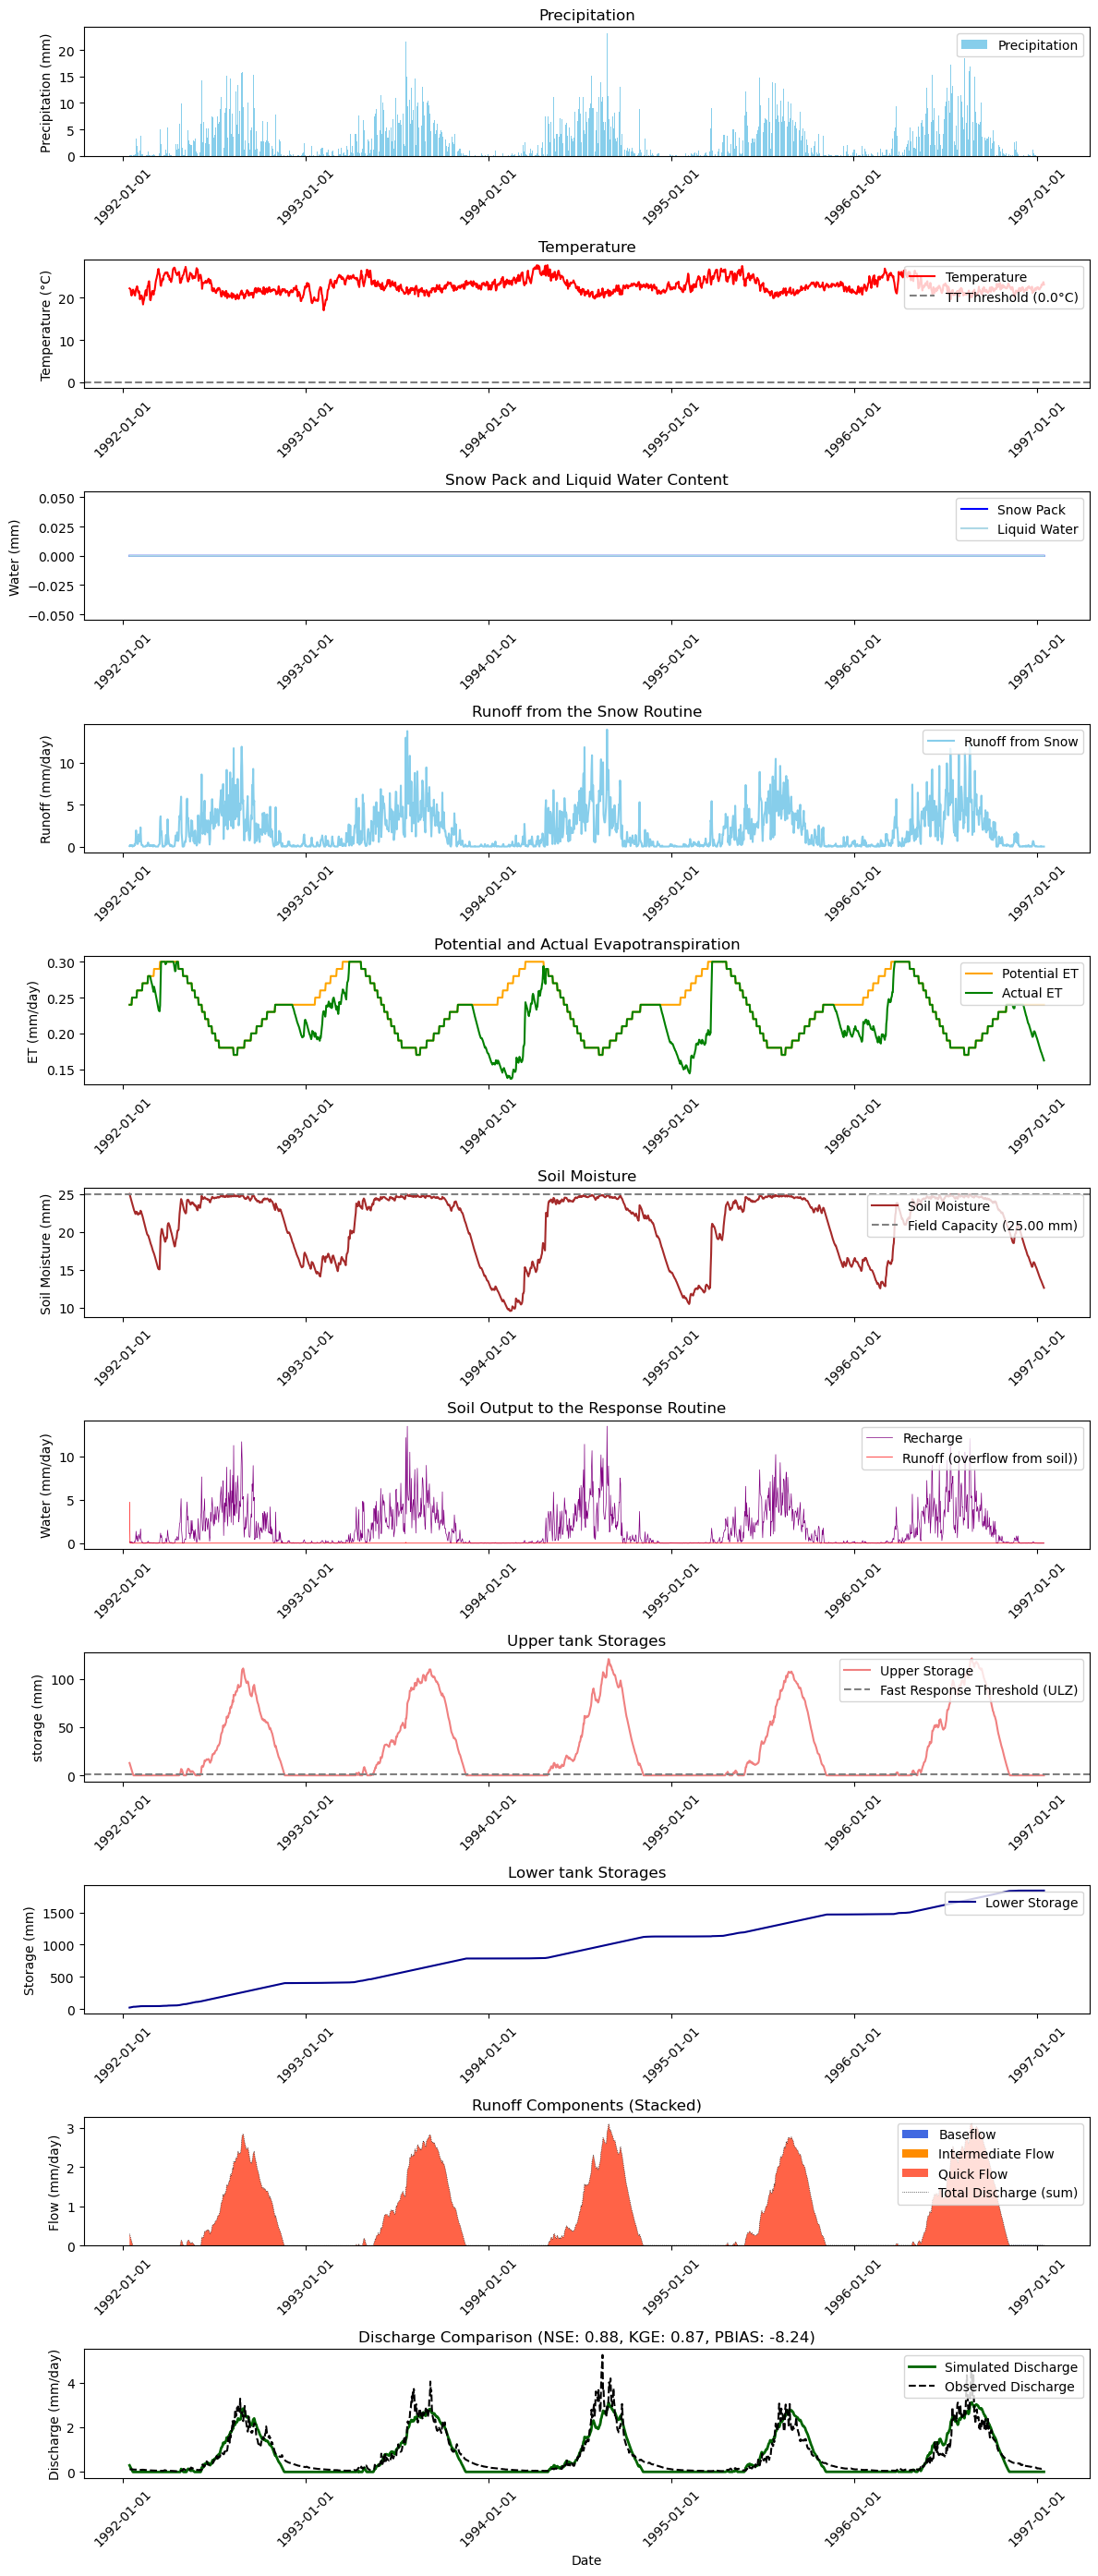

In [25]:
results = model.calibrate(
    method='SLSQP',     # Optimization algorithm——Options include 'SLSQP', 'L-BFGS-B', 'Nelder-Mead', etc.
    objective='RMSE',    # Objective function to optimize
    iterations=500000000,     # Maximum iterations
    verbose=True,       # Print progress
    plot_results=True   # Plot results after calibration
)

# The model now has calibrated parameters
# You can access them via model.params

# You can also access the calibration results
optimized_params = results['parameters']
performance = results['performance']
optimization_details = results['optimization_result']


Starting uncertainty analysis with 1000 runs...
Sampling 14 parameters uniformly across their ranges
Evaluating with NSE as the objective function


  0%|          | 0/1000 [00:00<?, ?it/s]

Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -201119.586
KGE: -67.657
PBIAS: 6843.5%
Correlation: -0.081
Performance metrics calculated:
NSE: -201119.586
KGE: -67.657
PBIAS: 6843.5%
Correlation: -0.081
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -4.924
KGE: -0.071
PBIAS: 52.4%
Correlation: 0.416
Performance metrics calculated:
NSE: -4.924
KGE: -0.071
PBIAS: 52.4%
Correlation: 0.416
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -6.642
KGE: -1.470
PBIAS: 245.7%
Correlation: 0.861
Performance metrics calculated:
NSE: -6.642
KGE: -1.470
PBIAS: 245.7%
Correlation: 0.861
Starting model run for 1828 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: -250.328
KGE: -3.497
PBIAS: 233.6%
Correlation: 0.019
Performance metrics calculated:
NSE: -250.328
KGE: -3.497

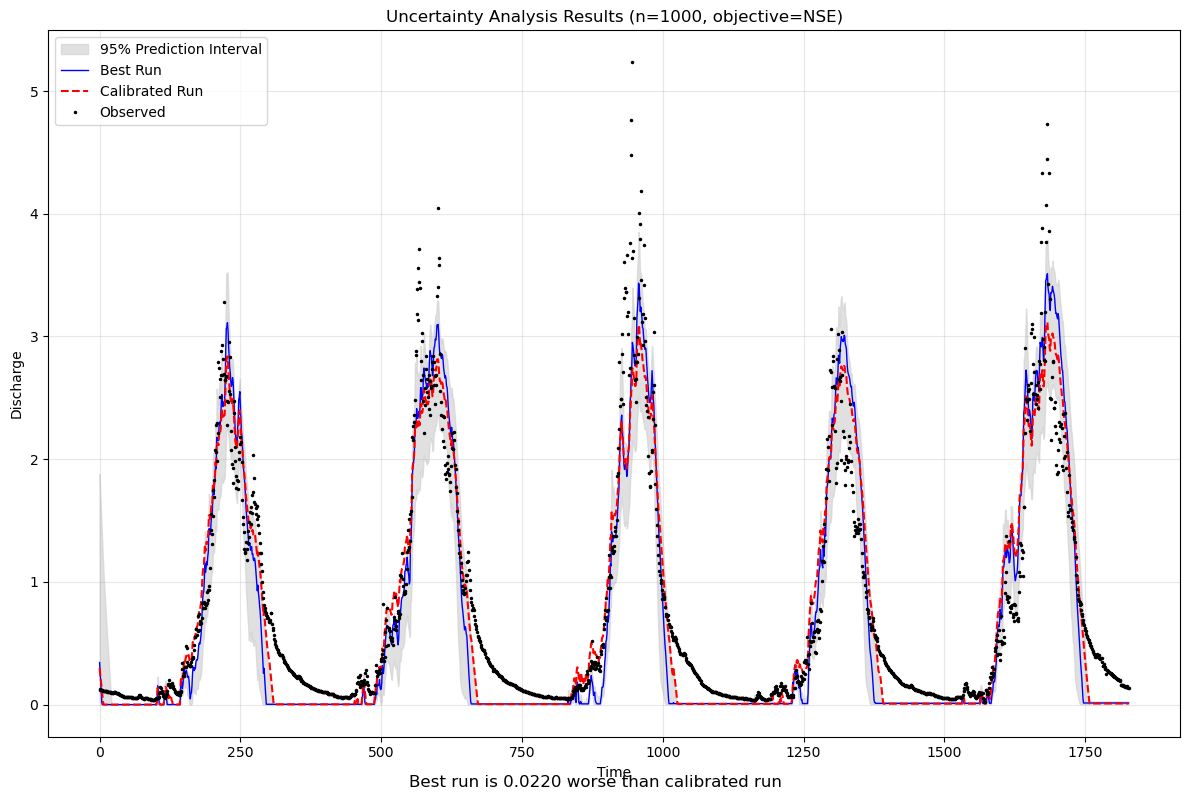

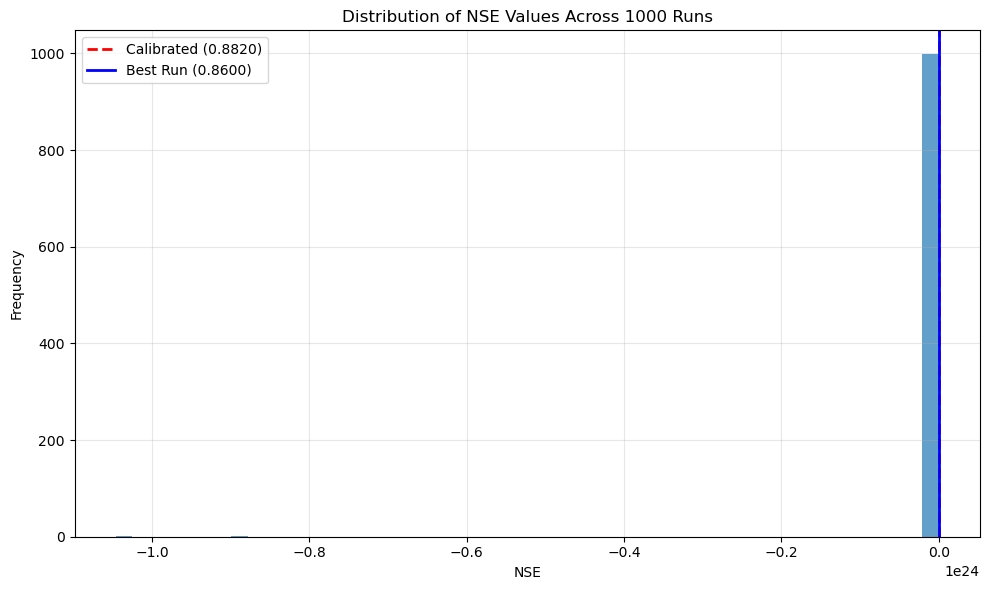

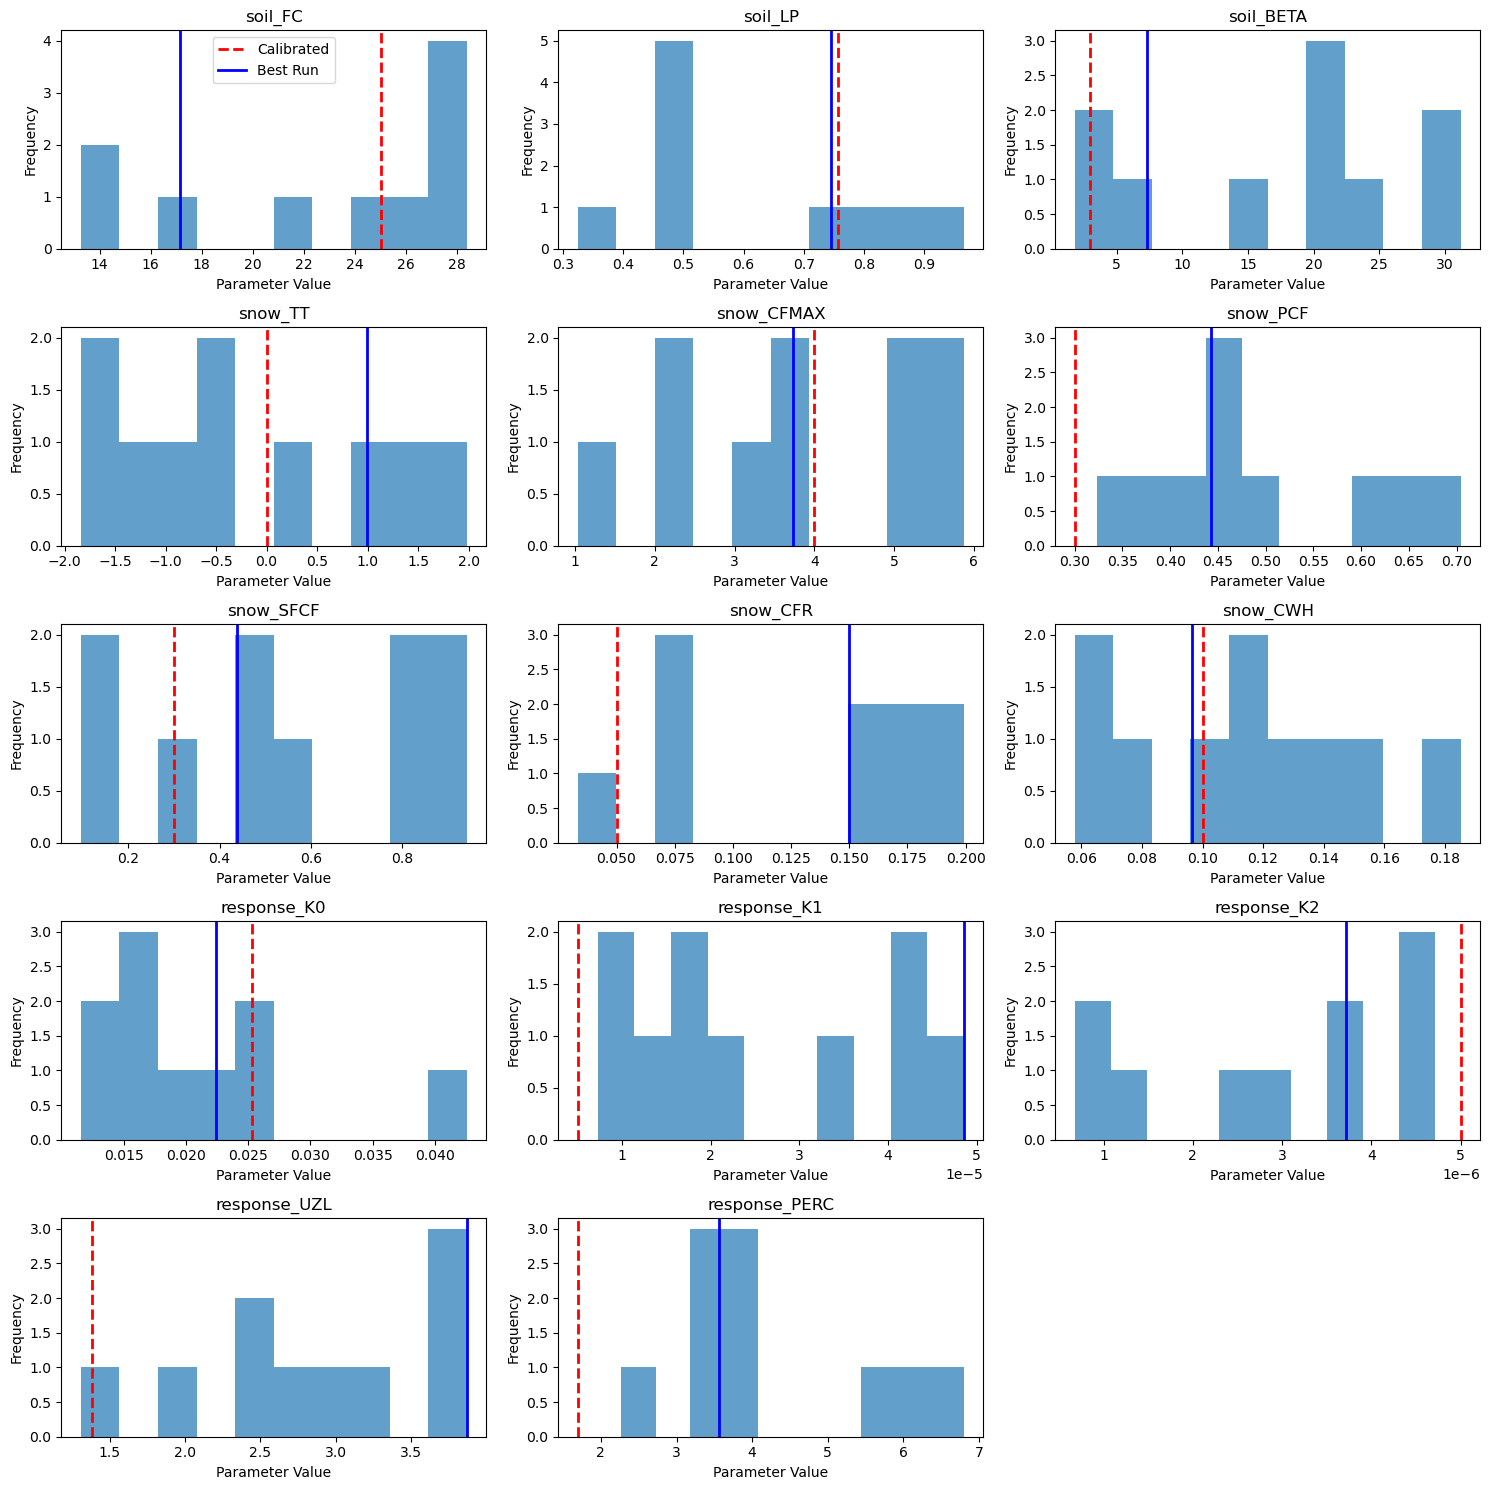


Uncertainty analysis completed in 16.81 seconds
Analyzed 1000 parameter sets

Top Performance Values:
  Run 1: NSE = 0.8600
  Run 2: NSE = 0.8482
  Run 3: NSE = 0.8431
  Run 4: NSE = 0.8375
  Run 5: NSE = 0.8259

Original (Calibrated) Performance: NSE = 0.8820
Best run is 0.0220 worse than calibrated run


In [26]:
# Then run uncertainty analysis
uncertainty_results = model.evaluate_uncertainty(
    n_runs=1000,           # Number of Monte Carlo runs
    objective='NSE',        # Performance metric to use
    save_best=10,           # Number of best parameter sets to save
    plot_results=True,      # Generate visualization
    verbose=True,           # Print progress information
    seed=42                 # Optional random seed for reproducibility
)

{'soil': {'FC': {'min': 10, 'max': 30, 'default': 24.97504117339849},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.9347680051105499},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.185019843214613}},
 'response': {'K0': {'min': 0.001,
   'max': 0.1,
   'default': 0.007794774649733207},
  'K1': {'min': 5e-06, 'max': 5e-05, 'default': 4.9947530628723694e-05},
  'K2': {'min': 5e-07, 'max': 5e-06, 'default': 4.160838692464326e-06},
  'UZL': {'min': 1, 'max': 4, 'default': 1.0},
  'PERC': {'min': 1, 'max': 7, 'default': 6.999999999999747}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4.0},
  'PCF': {'min': 0.75, 'max': 1.0, 'default': 0.7500000000000272},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}}}

In [30]:
performance

{'NSE': 0.9126435653586553,
 'KGE': 0.8823810664350796,
 'PBIAS': 5.067602733997094,
 'r': 0.9577550413049972}

In [19]:
custom_params_UBNB ={'response': {'K0': {'min': 0.001,
   'max': 0.1,
   'default': 0.017928309254250915},
  'K1': {'min': 5e-06, 'max': 5e-05, 'default': 5.0004427280349905e-06},
  'K2': {'min': 5e-07, 'max': 5e-06, 'default': 5e-06},
  'UZL': {'min': 1, 'max': 4, 'default': 1.494382401198882},
  'PERC': {'min': 1, 'max': 7, 'default': 4.287418116492705}},
 'soil': {'FC': {'min': 10, 'max': 30, 'default': 24.99995429108948},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.7511074936130249},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.0001846960034175}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4.0},
  'PCF': {'min': 0.3, 'max': 1.0, 'default': 0.9273536670591036},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}}}
custom_params_lookout = {
    'snow': {
        'TT': {'min': -2.0, 'max': 2.0, 'default': 0.0},      # Temperature threshold for snow/rain (°C)
        'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 4},      # Degree-day factor (mm/°C/day)
        'PCF': {'min': 0.65, 'max': 1.0, 'default': 0.67},      # Precipitation correction factor (-)
        'SFCF': {'min': 0, 'max': 1.5, 'default': 0.3},     # Snowfall correction factor (-)
        'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.05},     # Refreezing coefficient (-)
        'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.1}       # Water holding capacity of snow (-)
    },
    'soil': {
        'FC': {'min': 50.0, 'max': 650, 'default': 450.0},  # Field capacity (mm)
        'LP': {'min': 0.3, 'max': 1.0, 'default': 0.75},      # Limit for potential evaporation (-)
        'BETA': {'min': 1.0, 'max': 35, 'default': 3.0}      # Shape coefficient (-)
    },
    'response': {
        'K0': {'min': 0.01, 'max': 0.9, 'default': 0.12},      # Quick flow recession coefficient (1/day)
        'K1': {'min': 0.05, 'max': 0.5, 'default': 0.05},     # Intermediate flow recession coefficient (1/day)
        'K2': {'min': 0.005, 'max': 0.5, 'default': 0.05},     # Baseflow recession coefficient (1/day)
        'UZL': {'min': 5.0, 'max': 50.0, 'default': 28.0},    # Upper zone threshold (mm)
        'PERC': {'min': 0.03, 'max': 25, 'default': 0.25}     # Percolation rate (mm/day)
    }
}

custom_params_HBV_land ={'response': {'K0': {'min': 0.01, 'max': 0.9, 'default': 0.11323336086000878},
  'K1': {'min': 0.005, 'max': 0.5, 'default': 0.0646675395143037},
  'K2': {'min': 0.0005, 'max': 0.5, 'default': 0.018321217741902936},
  'UZL': {'min': 5.0, 'max': 50.0, 'default': 26.61999369079226},
  'PERC': {'min': 0.03, 'max': 25, 'default': 0.03}},
 'soil': {'FC': {'min': 50.0, 'max': 650, 'default': 449.7368169438645},
  'LP': {'min': 0.3, 'max': 1.0, 'default': 0.7745757831402357},
  'BETA': {'min': 1.0, 'max': 35, 'default': 3.3155189242761236}},
 'snow': {'TT': {'min': -2.0, 'max': 2.0, 'default': -1.099975575374229},
  'CFMAX': {'min': 1.0, 'max': 6.0, 'default': 6.0},
  'PCF': {'min': 0.65, 'max': 1.0, 'default': 1.0},
  'SFCF': {'min': 0, 'max': 1.5, 'default': 1.0368534489917745},
  'CFR': {'min': 0.0, 'max': 0.2, 'default': 0.06867576949957854},
  'CWH': {'min': 0.0, 'max': 0.2, 'default': 0.08436634612318128}}}
model.set_parameters(custom_params_UBNB)
